# Disease Outbreak and ENSO

## 1. Introduction

### Introduction to climate sensitive diseases

Diseases:
- Hantavirus
- Malaria
- Dengue
- Possibly others -- depends on data (cholera, Influenza, Meningococcal Meningitis)

Super cool list of climate-sensitive diseases and what aspects of climate they depend on: https://www.nsf.gov/news/speeches/colwell/rc02_hippocratic/tsld013.htm 
- Try for 2-3 vector borne, 1 water borne, 1 air borne

What factors influence these diseases’ spreads → dependence on certain climate conditions for spread (pests that favor certain conditions, etc)

### Introduction to El Nino

- Audience: people in our class
- Say a little bit about ENSO -- do a “reminder”, not too much time
- Talk about the parts that are relevant to the diseases mentioned above

### Previous work

- Global Disease Outbreaks Associated with the 2015–2016 El Niño Event https://www.nature.com/articles/s41598-018-38034-z#Sec9
- Predicting Climate-Sensitive Infectious Diseases to Protect Public Health and Strengthen National Security https://www.globalchange.gov/sites/globalchange/files/EID%20science%20plan.pdf

### My goals for this project ***

- Basic modeling of the disease data I found
    - Comparison of the different diseases to each other
- Reproduce some of the results → find correlations in historical data between confirmed cases of different diseases and various climate conditions (precipitation, Nino 3.4, humidity, etc)
- Make the historical predictions: Try and predict disease outbreaks for the 2015-2016 El Nino using the older data
- Make future predictions: What does the predicted/current La Nina mean for disease outbreak?
- Maybe other correlations: disease outbreak and intervention (did intervention correlate with disease outbreak?, what interventions were effective?, did govt warnings impact disease outbreak?) ** need more ideas for this/ how to actually do this
- All throughout: compare results BETWEEN diseases for each step (vector vs water vs air)

## 2. Data

### Hantavirus in the US (https://www.cdc.gov/hantavirus/surveillance/index.html)
- By year
- By state

In [10]:
import pandas as pd
hantavirus_year = pd.read_csv("HantaVirusTableData_year.csv")
hantavirus_year

,,,HantaVirusTableData
All available Hanta Virus Data,NaN,NaN,NaN
Patient,IllnessOnsetDate,StateFIPS,Outcome
32,1993-04-09,4,Alive
33,1993-06-18,4,Dead
34,1993-06-19,4,Dead
...,...,...,...
795,2018-07-08,53,Alive
796,2018-08-07,56,Alive
797,2018-10-24,56,Alive
NaN,NaN,NaN,NaN


In [11]:
import pandas as pd
hantavirus_state = pd.read_csv("HantaVirusTableData_state.csv")
hantavirus_state

,Table of US Hantavirus Cases by State (All Years),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,State,Died,Lived,Unknown Outcome,Total
2,Alabama,0,0,0,0
3,Alaska,0,0,0,0
4,Arizona,25,53,1,79
5,Arkansas,1,0,0,1
6,California,19,47,1,67
7,Colorado,40,72,0,112
8,Connecticut,0,1,0,1
9,Delaware,0,1,0,1


### Malaria*, TB, HIV in Tanzania → THIS DATA AVAILABLE FOR EVERY COUNTRY (https://www.who.int/data/gho/data/countries/country-details/GHO/united-republic-of-tanzania?countryProfileId=40f06adc-047c-435c-b576-ebd4da789bb2)
- By year

In [8]:
import pandas as pd
tanzania_malaria = pd.read_csv("tanzania.csv")
tanzania_malaria

,Indicator,Dim1,Period,Tooltip,IndicatorCode,FactValueForMeasure,FactValueString,FactValueUoM,FactComments,LanguageName,...,DataSourceDimValueCode,SpatialDimValueCode,Dim1ValueCode,Dim2ValueCode,Dim3ValueCode,SlicingDimCode,SlicingDimValueCode,IsLatestYear,LatestYearLabel,FactValueNumericPrefix
0,Malaria incidence (per 1 000 population at risk),NaN,2018,124.3,SDGMALARIA,124.30,NaN,NaN,NaN,English,...,NaN,TZA,NaN,NaN,NaN,NaN,NaN,True,Latest,NaN
1,Malaria incidence (per 1 000 population at risk),NaN,2017,124,SDGMALARIA,124.00,NaN,NaN,NaN,English,...,NaN,TZA,NaN,NaN,NaN,NaN,NaN,False,2017,NaN
2,Malaria incidence (per 1 000 population at risk),NaN,2016,123.6,SDGMALARIA,123.60,NaN,NaN,NaN,English,...,NaN,TZA,NaN,NaN,NaN,NaN,NaN,False,2016,NaN
3,Malaria incidence (per 1 000 population at risk),NaN,2015,121.7,SDGMALARIA,121.70,NaN,NaN,NaN,English,...,NaN,TZA,NaN,NaN,NaN,NaN,NaN,False,2015,NaN
4,Malaria incidence (per 1 000 population at risk),NaN,2014,118.9,SDGMALARIA,118.90,NaN,NaN,NaN,English,...,NaN,TZA,NaN,NaN,NaN,NaN,NaN,False,2014,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,New HIV infections (per 1000 uninfected popula...,Both sexes,1994,5.27 [4.73-5.73],SDGHIV,5.27,NaN,NaN,NaN,English,...,NaN,TZA,BTSX,NaN,NaN,NaN,NaN,False,1994,NaN
125,New HIV infections (per 1000 uninfected popula...,Both sexes,1993,5.38 [4.82-5.97],SDGHIV,5.38,NaN,NaN,NaN,English,...,NaN,TZA,BTSX,NaN,NaN,NaN,NaN,False,1993,NaN
126,New HIV infections (per 1000 uninfected popula...,Both sexes,1992,5.36 [4.78-6.08],SDGHIV,5.36,NaN,NaN,NaN,English,...,NaN,TZA,BTSX,NaN,NaN,NaN,NaN,False,1992,NaN
127,New HIV infections (per 1000 uninfected popula...,Both sexes,1991,5.19 [4.64-6.03],SDGHIV,5.19,NaN,NaN,NaN,English,...,NaN,TZA,BTSX,NaN,NaN,NaN,NaN,False,1991,NaN


### Dengue in Brazil → THIS DATA AVAILABLE FOR WESTERN HEMISPHERE (https://www.paho.org/data/index.php/en/mnu-topics/indicadores-dengue-en/dengue-nacional-en/252-dengue-pais-ano-en.html?start=1)
- CAN’T FIGURE OUT HOW TO DOWNLOAD DATA NOT AS PDF***

### Malaria in Venezuela → https://www.paho.org/data/index.php/en/mnu-topics/indicadores-malaria-en.html
- Plot from last week:

years:  [2000 2000 2001 2001 2002 2002 2003 2003 2004 2004 2005 2005 2006 2006
 2007 2007 2008 2008 2009 2009 2010 2010 2011 2011 2012 2012 2013 2013
 2014 2014 2015 2015 2016 2016 2017 2017]
cases:  [ 29736.   29736.   28249.2  20006.   26762.4  29491.   31719.   25275.6
  46655.   23788.8  22302.   45049.   37062.   20815.2  19328.4  41749.
  17841.6  32037.   35828.   16354.8  45155.   14868.   45824.   13381.2
  11894.4  52803.   10407.6  78643.    8920.8  90708.    7434.  136402.
 240613.  124023.  113239.  414527. ]


Text(0.5, 1.0, 'Malaria Cases in Venezuela 2000 to 2017')

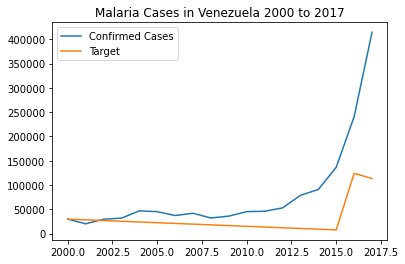

In [12]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import pandas as pd

venezuela_malaria = pd.read_csv("W_Graph-Line_data_utf8.csv",header=0,index_col=False )
years = venezuela_malaria["Year"].to_numpy()
print("years: ",years)
cases = venezuela_malaria["Value"].to_numpy()
print("cases: ",cases)
cc = np.where(venezuela_malaria.Indicator1 == "Confirmed Cases")[0]
tar1 = np.where(venezuela_malaria.Indicator1 == "MDG Target")[0]
tar2 = np.where(venezuela_malaria.Indicator1 == "GTS Target")[0]
target = np.concatenate((tar1, tar2))
years_cc = years[cc]
cases_cc = cases[cc]
years_tar = years[target]
cases_tar = cases[target]
plt.plot(years_cc,cases_cc, label = "Confirmed Cases")
plt.plot(years_tar,cases_tar, label = "Target")
plt.legend()
plt.title("Malaria Cases in Venezuela 2000 to 2017")

In [13]:
venezuela_malaria

,Indicator Group,Country,Indicator Group 2,Indicator Group1,Indicator1,Value,Year,Unnamed: 7
0,True,Venezuela,Cases Confirmed & MDG/GTS Target,Morbidity & mortality,MDG Target,29736.0,2000,NaN
1,True,Venezuela,Cases Confirmed & MDG/GTS Target,Morbidity & mortality,Confirmed Cases,29736.0,2000,NaN
2,True,Venezuela,Cases Confirmed & MDG/GTS Target,Morbidity & mortality,MDG Target,28249.2,2001,NaN
3,True,Venezuela,Cases Confirmed & MDG/GTS Target,Morbidity & mortality,Confirmed Cases,20006.0,2001,NaN
4,True,Venezuela,Cases Confirmed & MDG/GTS Target,Morbidity & mortality,MDG Target,26762.4,2002,NaN
5,True,Venezuela,Cases Confirmed & MDG/GTS Target,Morbidity & mortality,Confirmed Cases,29491.0,2002,NaN
6,True,Venezuela,Cases Confirmed & MDG/GTS Target,Morbidity & mortality,Confirmed Cases,31719.0,2003,NaN
7,True,Venezuela,Cases Confirmed & MDG/GTS Target,Morbidity & mortality,MDG Target,25275.6,2003,NaN
8,True,Venezuela,Cases Confirmed & MDG/GTS Target,Morbidity & mortality,Confirmed Cases,46655.0,2004,NaN
9,True,Venezuela,Cases Confirmed & MDG/GTS Target,Morbidity & mortality,MDG Target,23788.8,2004,NaN


### MORE DATA - WANT CHOLERA AND INFLUENZA OR MENINGOCOCCAL MENINGITIS

- Having trouble working with these datasets in Jupyter notebook, maybe better way to read them into the notebook?

## 3. Methods

- Go through the different methods we learned in class and use the applicable ones
    - Significance testing
    - Correlations
    - Regression
- How to compare data that "looks" so different?
    - Only have numbers by year -- how much can really be done, is that too big a time step?
    - location is most specific at state, no lat/long coordinates

## 4. To be done in paper:

### Analysis
### Results
### Conclusions
### References